# Bank Customer Churn Prediction(Kaggle)

## 1. 문제 정의

고객의 은행 이탈 여부를 예측(binary classification)하는 문제.
1. 평가 척도는 ROC-AUC
2. 데이터 설명
- id: 인덱스
- Customer ID: 각 고객의 고유 식별번호
- Surname: 고객의 성
- Credit Score: 고객의 신용점수
- Geography: 고객이 거주하는 국가
- Gender: 고객의 성별
- Age: 고객의 나이
- Tenure: 고객이 은행을 이용한 기간
- Balance: 고객의 계좌 잔액
- NumOfProducts: 고객이 이용하는 은행 상품의 수
- HasCrCard: 신용카드 보유 여부  (1: 보유 중, 0: 미보유)
- IsActiveMember: 활성 회원 여부  (1: 활성화된 고객, 0: 비활성화된 고객)
- EstimatedSalary: 고객의 예상 연봉
- Exited: 고객 이탈 여부  (1: 이탈 고객, 0: 비이탈 고객)

## 2. 탐색적 데이터 분석(EDA)

In [1]:
# 필요 라이브러리 로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 데이터 로드
bankchurn_df_org = pd.read_csv('./bank_churn_train.csv')
bankchurn_df = bankchurn_df_org.copy()
bankchurn_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [2]:
# 데이터프레임 확인
bankchurn_df.info()
print('\n 데이터 세트의 shape:', bankchurn_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

 데이터 세트의 shape: (165034, 14)


In [3]:
print('전체 데이터의 기술통계량 \n', bankchurn_df.describe())

전체 데이터의 기술통계량 
                 id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.

In [4]:
# 불필요한 칼럼 삭제
bankchurn_df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
bankchurn_df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


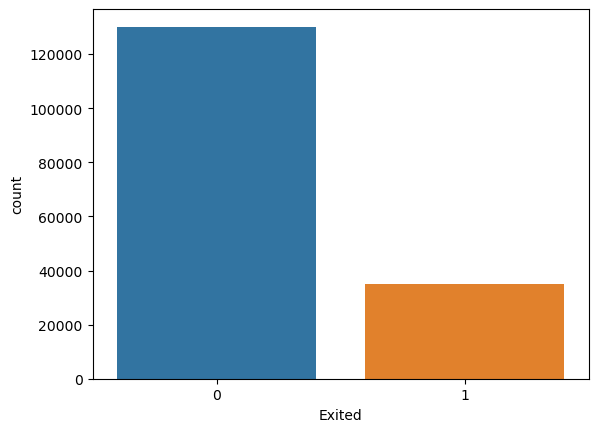

In [5]:
# 결측치 확인 - Null 값 없음
# 타겟값 분포도 확인 - 이탈 고객 비율이 적은 불균형 분포
sns.countplot(x='Exited', data=bankchurn_df)
plt.show()

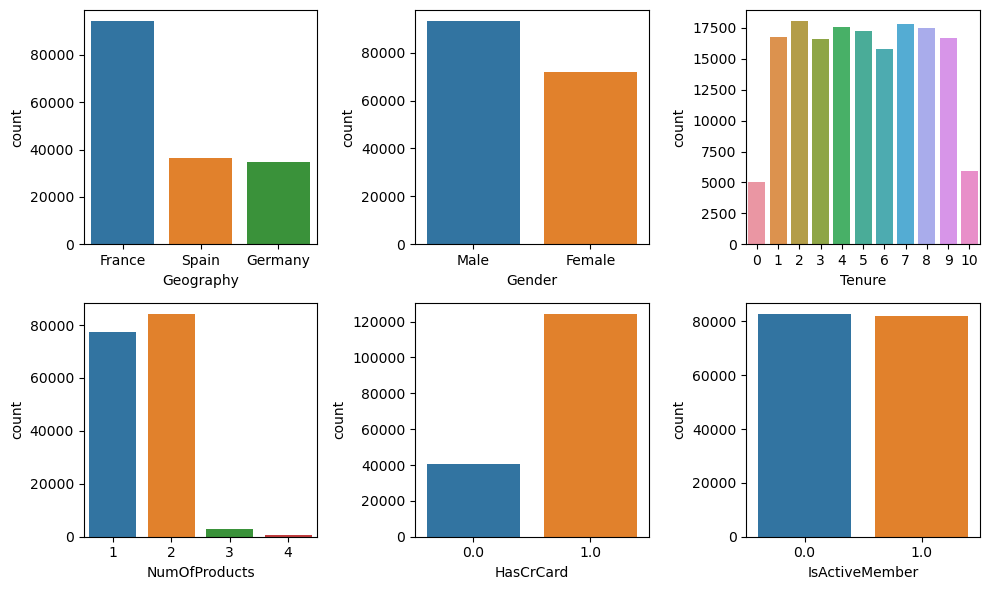

In [6]:
# 이산형 칼럼의 건수 시각화
cat_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for index, column in enumerate(cat_columns):
    row = index // 3  # 행 인덱스 계산
    col = index % 3   # 열 인덱스 계산
    sns.countplot(x=column, data=bankchurn_df, ax=axs[row, col])

plt.tight_layout()
plt.show()

- IsActiveMember, Gender, Tenure는 거의 균일한 분포를 보임
- 데이터 셋 중에는 France 고객이 가장 많았으며, 대부분의 사람들은 1, 2개 정도의 은행 상품에 가입되어 있음

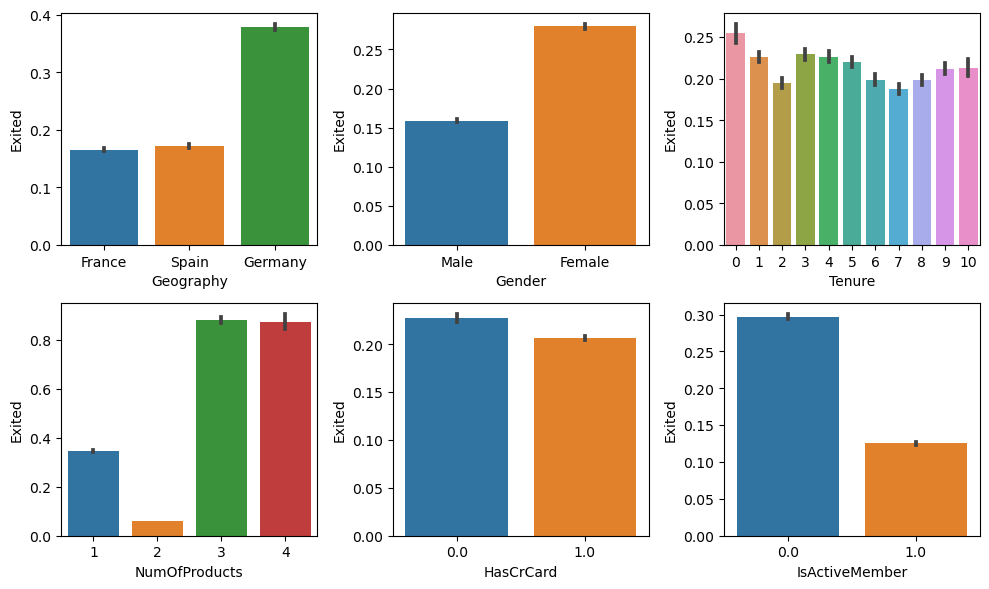

In [7]:
# 이산형 칼럼을 이탈 정도에 대하여 시각화
cat_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for index, column in enumerate(cat_columns):
    row = index // 3 
    col = index % 3   
    sns.barplot(x=column, y='Exited', data=bankchurn_df, ax=axs[row, col])

plt.tight_layout()
plt.show()

- 이탈 비율이 가장 높은 지역은 Germany. 고객 수가 비슷한 Spain에 비해 이탈 비율이 상당히 높다.
- 이용하는 은행 상품이 많은 경우(3, 4개) 이탈 비율도 큼 - 하지만 적은 경우(1, 2개) 에 비해 인원 수가 압도적으로 적은 것을 고려해야 함.
- 은행 이용 기간 및 신용카드 유무와 은행 이탈 여부는 큰 관계가 없어보임.
- ActiveMember일 수록 이탈할 가능성이 낮음.

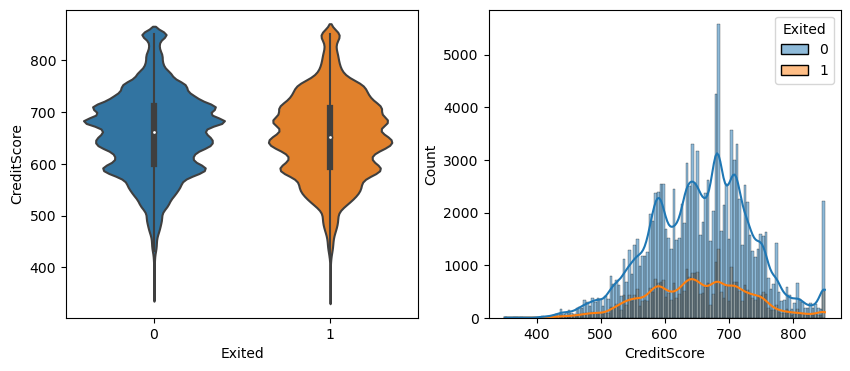

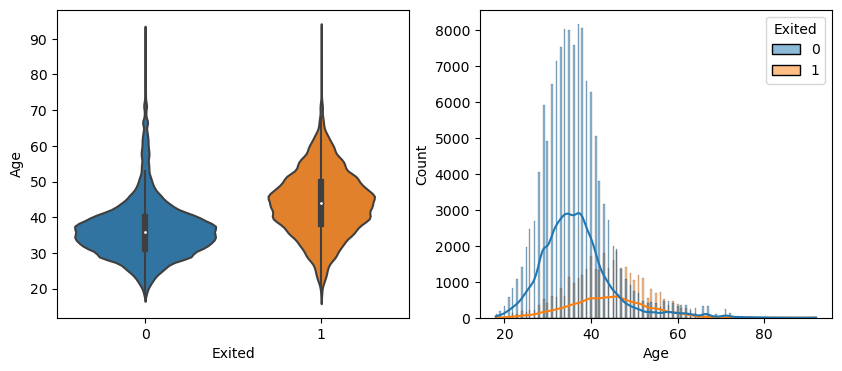

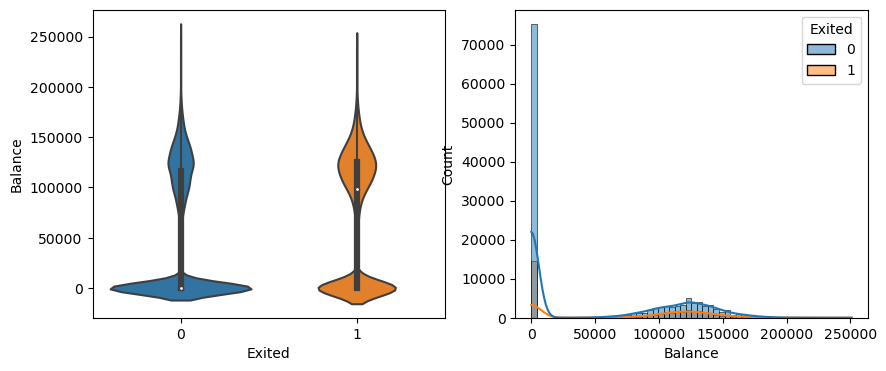

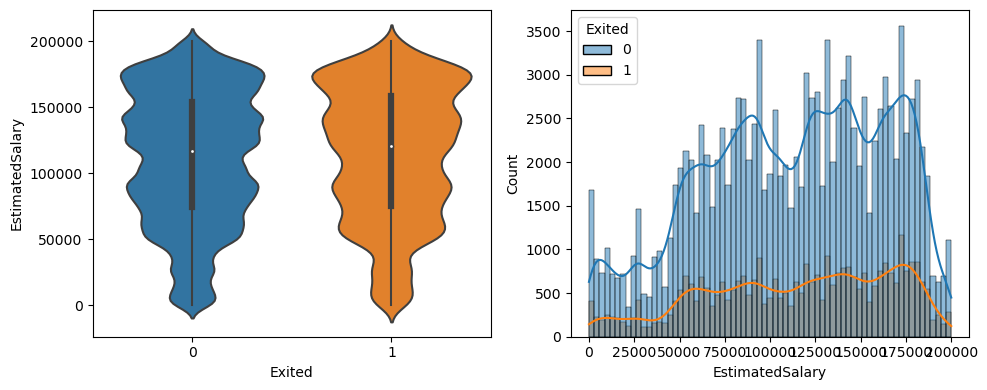

In [8]:
# 연속형 칼럼의 건수/ 시각화
cont_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # Exited값 별 개별 칼럼의 바이올린 플롯
    sns.violinplot(x='Exited', y=column, data=bankchurn_df, ax=axs[0])
    # Exited 값에 따른 개별 칼럼의 히스토그램
    sns.histplot(x=column, data=bankchurn_df, kde=True, hue='Exited', ax=axs[1])

plt.tight_layout()
plt.show()

- 주 고객 나이대는 30초반 부터 40초반 이며, 이탈 비율은 40~50세 사이에서 가장 높음
- Balance는 0에 치우쳐진 분포를 보임

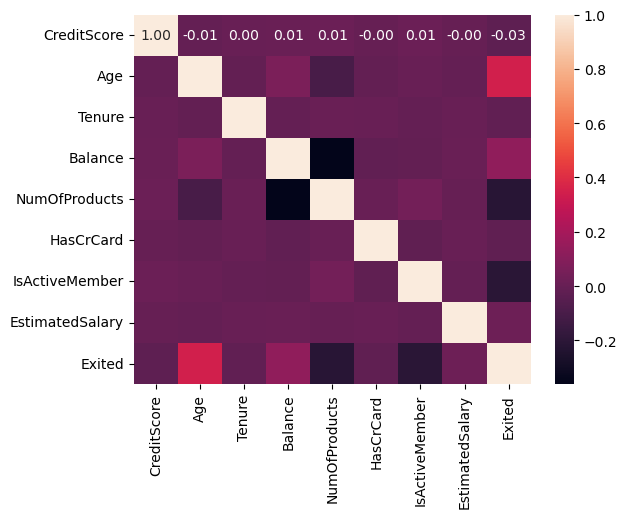

In [9]:
corr = bankchurn_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=True)
plt.show()

In [10]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


- 결정값인 Exited는 Age와 0.34, IsActiveMember 및 NumOfProducts와 -0.21, Balance와 0.13의 상관계수를 가짐
- Balance와 NumOfProducts는 -0.36으로 서로 밀접한 관계가 있다, 그 외의 칼럼 간에는 서로 큰 영향을 주지 않을 것으로 관찰됨

### 추가 EDA 방향
1. 더 디테일한 인사이트 발굴
- 이번주는 전체적인 분포랑 Exited에 집중했는데, 생각보다 인사이트를 찾기 까다롭고 두루뭉실한 경향이 있어서 더 세부적이고 정량화할 수 있는 방법을 더 찾아봐야 할 것 같습니다
- 예를 들어, 뚜렷한 분포 차이가 있던 Age와 Geography는 어떨까: 이탈이 높은 나이 대 위주로
- Tenure, CreditScore, EstimatedSalary와 같이 꽤 분포가 골고루 있는 피처를 어떻게 더 분석할 수 있나
- 상관계수가 높은 피처들끼리 EDA 더 진행해보기
- 좀 더 한눈에 결과를 모아보기 편한 tool이 있으면 그걸 사용해 보는것도 좋을 거 같네요: 세션 발표에서 다른 조가 sweetviz를 사용하던데 그거를 사용해보던가 다른 걸 찾아보니 Pandas Profiling 라이브러리도 좋아보입니다!
2. https://velog.io/@tngus0325/%EA%B3%A0%EA%B0%9D-%EC%9D%B4%ED%83%88-%EC%98%88%EB%B0%A9%EC%9D%84-%EC%9C%84%ED%95%9C-%EC%9D%B4%ED%83%88-%EA%B3%A0%EA%B0%9D-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EB%8C%80%EC%95%88%EC%B1%85-%EC%88%98%EB%A6%BD#%ED%95%B4%EA%B2%B0%EB%B0%A9%EC%95%88 처럼 EDA 이후 통계분석을 통해 '고객의 이탈을 막기위해 ~ 부분에 집중해서 ~한 대책이 필요하다' 와 같이 얻은 인사이트를 통해 문제해결에 이용하는 방향성도 괜찮은 것 같습니다(아무래도 EDA 스터디니까요)

In [11]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.Collecting sweetviz
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 3.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/15.1 MB 10.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.1 MB 12.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/15.1 MB 13.6 MB/s eta 0:00:01
   -------- ------------------------------- 3.1/15.1 MB 14.3 MB/s eta 0:00:01
   ---------- ----------------------------- 3.9/15.1 MB 14.8 MB/s eta 0:00:01
   ------------ --------------------------- 4.7/15.1 MB 15.9 MB/s eta 0:00:01
   -------------- ------------------------- 5.5/15.1 MB 16.0 MB/s eta 0:00:01
   ---------------- ----------------------- 6.4/15.1 MB 16.3 MB/s eta 0:00:01
   ------------------- -------------------- 7.4/15.1 MB 16.9 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/15.1 MB 17.3 MB/s 

In [12]:
import sweetviz as sv

report = sv.analyze(bankchurn_df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv('./bank_churn_train.csv')
df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [2]:
# Age 위주로 관찰 - 이탈 고객 수 자체는 30중반에서 40중반까지가 가장 많음
# 연령대별 이탈률 관찰
def create_age_group(age):
    if age < 30:
        return '20s under'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return 'over 60s'

df['AgeGroup'] = df['Age'].apply(create_age_group)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0,30s
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0,30s
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0,40s


20s under 총 인원수 : 23534, 이탈 인원수 : 1966, 이탈 비율 : 0.084
30s 총 인원수 : 81253, 이탈 인원수 : 8799, 이탈 비율 : 0.108
40s 총 인원수 : 43319, 이탈 인원수 : 15075, 이탈 비율 : 0.348
50s 총 인원수 : 12186, 이탈 인원수 : 7426, 이탈 비율 : 0.609
over 60s 총 인원수 : 4742, 이탈 인원수 : 1655, 이탈 비율 : 0.349


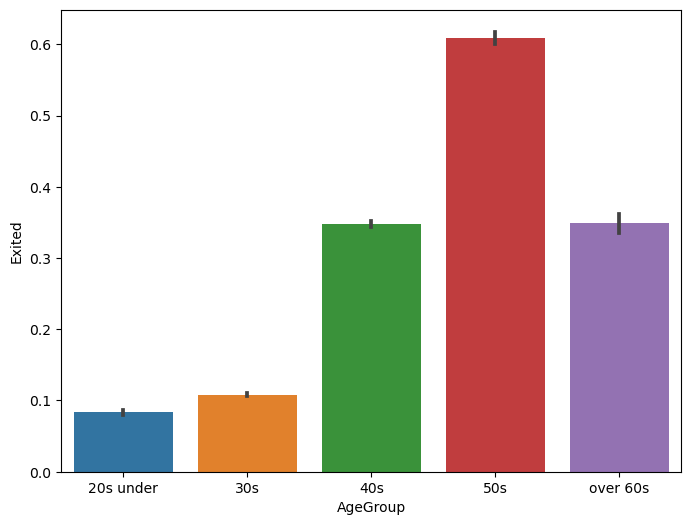

In [3]:
AgeGroup = ['20s under', '30s', '40s', '50s', 'over 60s']
AgeExitRates = []

for i in AgeGroup:
    AgeExited = df.loc[(df['AgeGroup'] == i) & (df['Exited'] == 1) , :].shape[0]
    AgeData = df.loc[df['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    AgeExitRates.append(exit_rate)
    print('{0} 총 인원수 : {1}, 이탈 인원수 : {2}, 이탈 비율 : {3}'.format(i, AgeData, AgeExited, exit_rate))

plt.figure(figsize=(8, 6))
sns.barplot(data=df.sort_values(by='AgeGroup'), x='AgeGroup', y='Exited')
plt.show()

- 이탈률 자체는 50대가 60%정도로 가장 크지만, 이탈 인원 자체는 40대가 가장 많으며(50대보다 2배 이상), 이탈률도 35%로 2번째로 크다.
- 30~40대가 주된 경제활동인구라고 생각되는데, 30대에 비해 40대의 이탈률이 3배정도 큰 이유에 관해서도 논의할 만한 가치가 있을 것...?

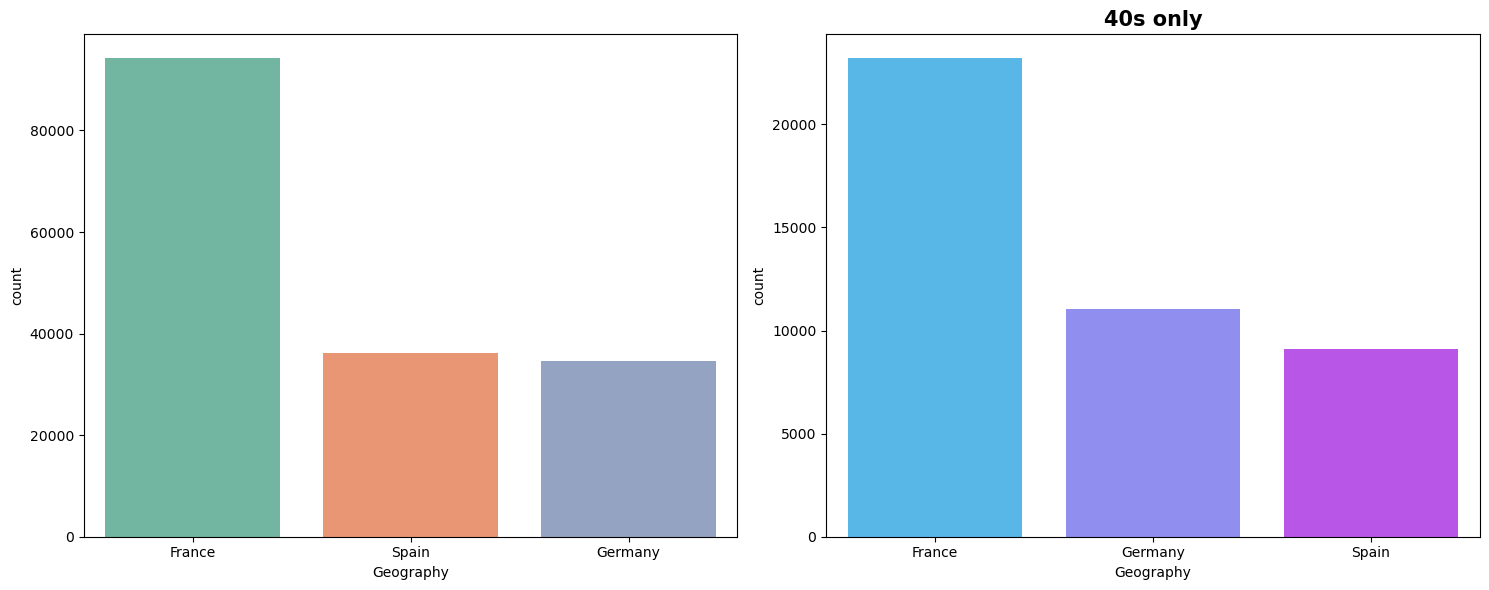

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='Geography', data=df, palette='Set2', ax=axs[0])

# 40대 고객의 지역별 분포
sns.countplot(x='Geography', data=df[df['AgeGroup'] == '40s'], palette='cool', ax=axs[1])
axs[1].set_title('40s only', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
Geography = ['France', 'Spain', 'Germany']

for i in Geography:
    GeoExited = df.loc[(df['Geography'] == i) & (df['Exited'] == 1) , :].shape[0]
    Geo40Exited = df.loc[(df['Geography'] == i) & (df['Exited'] == 1) & (df['AgeGroup'] == '40s') , :].shape[0]
    GeoData = df.loc[(df['Geography'] == i)].shape[0]
    Geo40Data = df.loc[(df['Geography'] == i) & (df['AgeGroup'] == '40s'), :].shape[0]
    exit_rate = round(GeoExited / GeoData, 3) if GeoData > 0 else 0
    exit40_rate = round(Geo40Exited / Geo40Data, 3) if GeoData > 0 else 0
    print('{0} 총 고객수 : {1}, 이탈 고객수 : {2}, 이탈 비율 : {3}'.format(i, GeoData, GeoExited, exit_rate))
    print('{0} 40대 총 고객수 : {1}, 이탈 고객수 : {2}, 이탈 비율 : {3}\n'.format(i, Geo40Data, Geo40Exited, exit40_rate))

France 총 고객수 : 94215, 이탈 고객수 : 15572, 이탈 비율 : 0.165
France 40대 총 고객수 : 23204, 이탈 고객수 : 6632, 이탈 비율 : 0.286

Spain 총 고객수 : 36213, 이탈 고객수 : 6235, 이탈 비율 : 0.172
Spain 40대 총 고객수 : 9085, 이탈 고객수 : 2610, 이탈 비율 : 0.287

Germany 총 고객수 : 34606, 이탈 고객수 : 13114, 이탈 비율 : 0.379
Germany 40대 총 고객수 : 11030, 이탈 고객수 : 5833, 이탈 비율 : 0.529



- 40대 위주로 분석했을 때, 40대 고객 수 및 이탈 고객수가 가장 많은 곳은 프랑스이다.
- 독일은 전체 이탈률(38%)도 가장 높지만 40대 이탈률(53%)도 가장 높음. 총 고객 수에 비해 이탈하는 고객수가 프랑스와 많이 차이나지 않는 것으로 보아 독일의 이탈률이 비교적 높다고 판단할 수 있음 -> '40대 고객', '독일 지역'을 중심으로 추가적인 분석을 하는 것이 은행의 입장에서 유리할것?

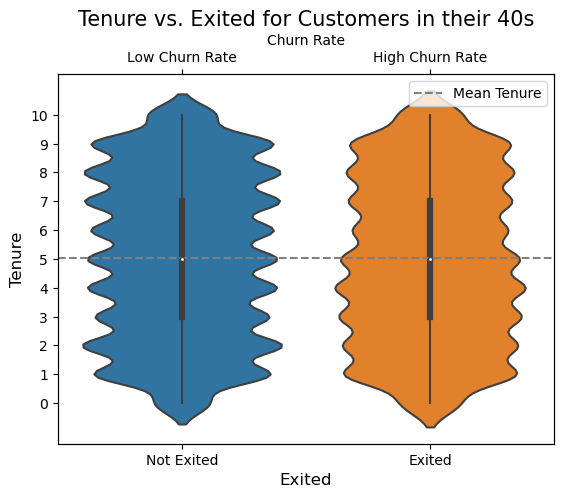

In [6]:
# 40대 고객 추가 분석 - Tenure에 따른 이탈률

age_40s_data = df[df['AgeGroup'] == '40s']

# 거래 기간(Tenure)에 따른 이탈률 시각화 (Violin Plot)
sns.violinplot(x=age_40s_data['Exited'], y=age_40s_data['Tenure'])

# 전체 표에 점선 추가
plt.axhline(y=age_40s_data['Tenure'].mean(), color='gray', linestyle='--', label='Mean Tenure')
plt.legend()  # 범례 표시

plt.title('Tenure vs. Exited for Customers in their 40s', fontsize=15)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'])  # x축 눈금 설정

# x축에 이탈률 표시
ax2 = plt.twiny()
ax2.set_xlim(0, 1)
ax2.set_xticks([0.25, 0.75])
ax2.set_xticklabels(['Low Churn Rate', 'High Churn Rate'])
ax2.set_xlabel('Churn Rate')

plt.yticks(ticks=range(int(age_40s_data['Tenure'].min()), int(age_40s_data['Tenure'].max()) + 1))  # y축 눈금 설정

plt.show()

- 거래 기간이 긴 경우(6년 이상) 짧은 경우(5년 이하)보다 이탈률이 조금 더 낮음

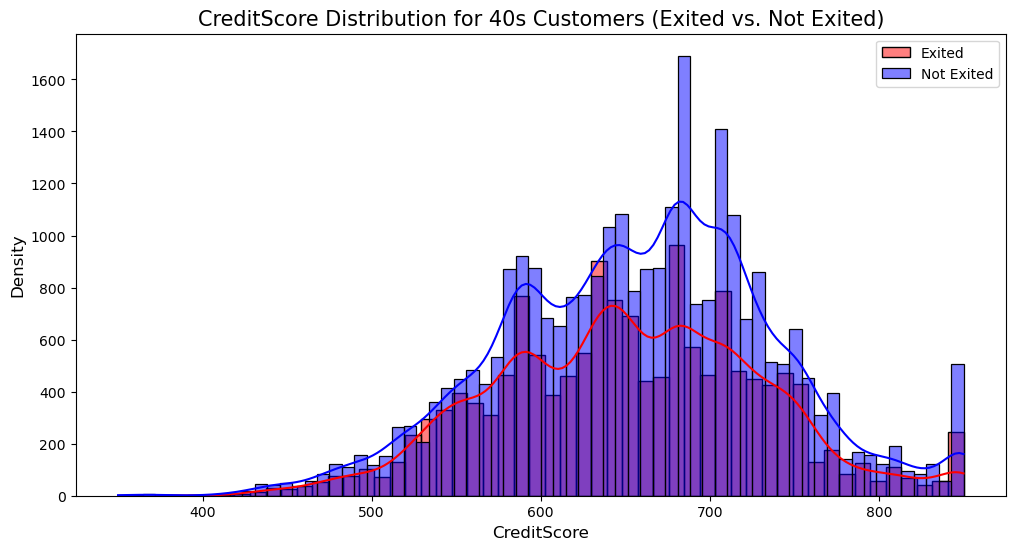

In [7]:
# 40대 고객 추가 분석 - Tenure에 따른 이탈률

age_40s_data = df[df['AgeGroup'] == '40s']

exited_data = age_40s_data[age_40s_data['Exited'] == 1]
not_exited_data = age_40s_data[age_40s_data['Exited'] == 0]

# CreditScore 분포 시각화
plt.figure(figsize=(12, 6))

sns.histplot(exited_data['CreditScore'], label='Exited', color='red', alpha=0.5, kde=True)
sns.histplot(not_exited_data['CreditScore'], label='Not Exited', color='blue', alpha=0.5, kde=True)

plt.title('CreditScore Distribution for 40s Customers (Exited vs. Not Exited)', fontsize=15)
plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

- CreditScore가 600점대 이탈률이 높음

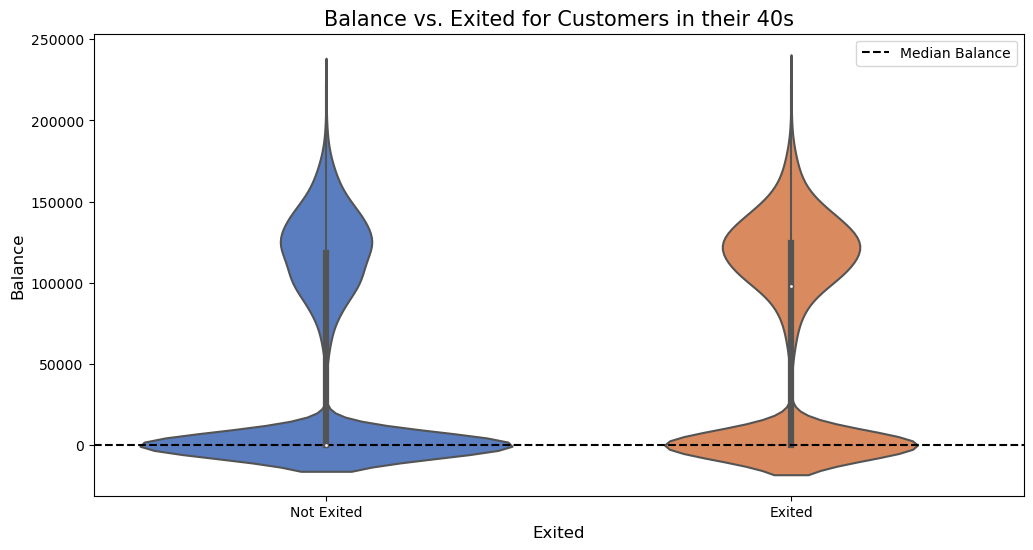

In [8]:
# 40대 고객 추가 분석 - Tenure에 따른 이탈률

age_40s_data = df[df['AgeGroup'] == '40s']

# 계좌잔액(Balance)에 따른 이탈률 시각화 (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exited', y='Balance', data=age_40s_data, palette="muted", split=True)
plt.axhline(y=age_40s_data['Balance'].median(), color='black', linestyle='--', label='Median Balance')
plt.title('Balance vs. Exited for Customers in their 40s', fontsize=15)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.legend()
plt.show()

- Balance가 0 고객들이 주로 이탈(중간값도 0)
- 0인 고객들을 제외하면 100000 ~ 150000 사이에서 많이 이탈

In [9]:
# 40대 Exited(종속변수)에 대해 CreditScore, Age, Tenure, Balance(독립변수)가 통계적으로 유의한가
# two sample t-test (H0 : 두 표본집단의 평균이 같다) - 독립성 정규성 등분산성 가정
# 모집단 정규분포를 가정하기 위해 balance=0인 값 제거

nonzero=df[df['Balance']!=0].reset_index(drop=True)
df_0_40s=nonzero.loc[(nonzero['Exited']==0)&(nonzero['AgeGroup']=='40s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)
df_1_40s=nonzero.loc[(nonzero['Exited']==1)&(nonzero['AgeGroup']=='40s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)

In [10]:
# CreditScore
from scipy import stats

t, p=stats.ttest_ind(df_0_40s.CreditScore,df_1_40s.CreditScore)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
7e-05


In [11]:
# Tenure
t, p=stats.ttest_ind(df_0_40s.Tenure,df_1_40s.Tenure)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.00017


In [12]:
# balance
t, p=stats.ttest_ind(df_0_40s.Balance,df_1_40s.Balance)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.
0.53963


In [13]:
# 범주형 변수와 Exited간 상관관계 
# chi-square test (H0 : 두 변수는 연관이 없다) 

nonzero_40 = nonzero.loc[nonzero['AgeGroup'] == '40s', :]
nonzero_40.drop('AgeGroup', axis=1, inplace=True)

nz4 = nonzero_40
nz4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21323 entries, 4 to 75384
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      21323 non-null  int64  
 1   Geography        21323 non-null  object 
 2   Gender           21323 non-null  object 
 3   Age              21323 non-null  float64
 4   Tenure           21323 non-null  int64  
 5   Balance          21323 non-null  float64
 6   NumOfProducts    21323 non-null  int64  
 7   HasCrCard        21323 non-null  float64
 8   IsActiveMember   21323 non-null  float64
 9   EstimatedSalary  21323 non-null  float64
 10  Exited           21323 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 2.0+ MB


In [14]:
count1, bin_dividers1 = np.histogram(nz4['Balance'], bins=3)
a1 = np.linspace(nz4['Balance'].min(), nz4['Balance'].max(), 4) 

nz4['BalLevel'] = pd.cut(nz4['Balance'], bins = bin_dividers1, include_lowest=True, labels=['Low','Mid', 'High'])
nz4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21323 entries, 4 to 75384
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      21323 non-null  int64   
 1   Geography        21323 non-null  object  
 2   Gender           21323 non-null  object  
 3   Age              21323 non-null  float64 
 4   Tenure           21323 non-null  int64   
 5   Balance          21323 non-null  float64 
 6   NumOfProducts    21323 non-null  int64   
 7   HasCrCard        21323 non-null  float64 
 8   IsActiveMember   21323 non-null  float64 
 9   EstimatedSalary  21323 non-null  float64 
 10  Exited           21323 non-null  int64   
 11  BalLevel         21323 non-null  category
dtypes: category(1), float64(5), int64(4), object(2)
memory usage: 2.0+ MB


In [15]:
# one-hot encoding - HasCrCard, IsActiveMember는 이미 카테고리형 이므로 나머지만
nz4_dm = pd.get_dummies(nz4, columns = ['Gender','BalLevel'], drop_first=True)

In [16]:
nz4_dm.drop('Geography', axis=1, inplace=True)

In [17]:
# scailing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(nz4_dm)
nz4_dm_sc = scaler.transform(nz4_dm)

nz4_dm_sc = pd.DataFrame(nz4_dm_sc)
nz4_dm_sc     
 
nz4_dm_sc.columns = nz4_dm.columns

In [18]:
nz4_dm_sc.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'BalLevel_Mid', 'BalLevel_High'],
      dtype='object')

In [19]:
col = ['HasCrCard', 'IsActiveMember', 'Gender_Male','BalLevel_Mid', 'BalLevel_High']
for i in col: 
    cross_data = pd.crosstab(index = nz4_dm_sc['Exited'], columns = nz4_dm_sc[i], 
                             margins=False)

    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(cross_data)
    msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
    print(f'<Exited and {i}>')
    print(msg.format(chi2, p, dof))
    if p < 0.05:
        print('dependent')
    else:
        print('independent')
    # print(expected)
    print('---------------------------')

<Exited and HasCrCard>
Test Statistic: 0.3412262221557575
p-value: 0.5591222770110764
Degree of Freedom: 1
independent
---------------------------
<Exited and IsActiveMember>
Test Statistic: 1513.6590420243292
p-value: 0.0
Degree of Freedom: 1
dependent
---------------------------
<Exited and Gender_Male>
Test Statistic: 576.6932052544885
p-value: 1.9650762535992593e-127
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_Mid>
Test Statistic: 66.6787534132271
p-value: 3.1956087217316383e-16
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_High>
Test Statistic: 39.270256687812086
p-value: 3.690200099997812e-10
Degree of Freedom: 1
dependent
---------------------------


40대 교차분석 결과(p value 0.05 기준)
- Exited와 HasCrCard는 서로 독립. 신용카드 여부가 고객의 이탈 결정에 직접적인 영향을 미치지 않을것
- Exited와 IsActiveMember, Gender, BalLevel_mid, BalLevel_High는 독립이 아님. 이탈여부와 상관관계

In [20]:
# NumOfProducts에 대해 회귀분석
X1 = nz4_dm_sc[['Age', 'BalLevel_Mid','BalLevel_High',
               'Tenure', 'CreditScore']]
y = nz4_dm_sc['NumOfProducts']
  
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['variable'] = X1.columns
print(vif)

   VIF Factor       variable
0    2.522812            Age
1    9.257911   BalLevel_Mid
2    2.065315  BalLevel_High
3    3.780491         Tenure
4    9.573916    CreditScore


In [21]:
import statsmodels.api as sm

X1_ad = sm.add_constant(X1)
model = sm.OLS(y, X1_ad).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          NumOfProducts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.512
Date:                Fri, 17 May 2024   Prob (F-statistic):             0.0279
Time:                        16:54:31   Log-Likelihood:                 5396.8
No. Observations:               21323   AIC:                        -1.078e+04
Df Residuals:                   21317   BIC:                        -1.073e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1253      0.008     15.466

- 유의미한 P-value를 보인 변수는 const, Age, BalLevel_mid 정도
- R-squared =  0.001 : 모델의 신뢰도가 매우 낮음..